# SRD - Statystyczne Reguły Decyzyjne - Projekt końcowy
# HR Analytics Case Study
<br>
<img src="work.jpg">
<br>

## Opis problemu
Duża firma o nazwie XYZ zatrudnia około 4000 pracowników, jednak każdego roku około 15% z nich odchodzi z firmy i należy zastąpić ich pulą nowych ludzi dostępnych na rynku pracy. Zarząd uważa, że ten poziom osłabienia personelu (odejście pracowników na własną rękę lub dlatego, że zostali zwolnieni) jest niekorzystne dla firmy z następujących powodów:

* Projekty byłych pracowników ulegają opóźnieniu, co utrudnia dotrzymanie terminów, a w konsekwencji powoduje utratę reputacji wśród konsumentów i partnerów
* Należy utrzymywać sporych rozmiarów dział rekrutacji 
* Najczęściej nowi pracownicy muszą być przeszkoleni do pracy i / lub mieć czas na aklimatyzację w firmie

Dlatego zarząd zawarł umowę z firmą analityczną HR, aby zrozumieć, na jakich czynnikach powinni się skupić, aby ograniczyć odejścia z firmy. Innymi słowy, chcą wiedzieć, jakie zmiany powinny zostać wprowadzone w miejscu pracy, aby większość pracowników została. Ponadto chcą wiedzieć, która z tych zmiennych jest najważniejsza i należy od razu zająć się właśnie tym czynnikiem.

## Cel analizy
Należy zamodelować prawdopodobieństwo odejścia pracownika za pomocą regresji logistycznej. Uzyskane w ten sposób wyniki zostaną wykorzystane przez kierownictwo do zrozumienia, jakie zmiany powinni wprowadzić w miejscu pracy, aby większość pracowników pozostała.

# Analiza zmiennych
Przed wyborem odpowiedniego modelu warto napierw przyjrzeć się bliżej zebranym danym. 

## Employee Survey - wyniki ankiety wśród pracowników
**EmployeeID** - id pracownika <br>
**EnvironmentSatisfaction** - Poziom zadowolenia ze środowiska pracy w skali od 1 do 4 (1 - 'Niski', 2 - "Średni", 3 - "Wysoki", 4 - "Bardzo wysoki"). <br> 
**JobSatisfaction** - Satysfakcja, zaangażowanie w wykonywaną pracę w skali od 1 do 4 (1 - 'Niska', 2 - "Średna", 3 - "Wysoka", 4 - "Bardzo wysoka"). <br>
**WorkLifeBalance** - Równowaga między życiem prywatnym a zawodowym (1 - 'Zła', 2 - 'Dobra', 3 - 'Bardzo dobra', 4 - 'Doskonała'). <br>

In [2]:
#Importing and installing required packages
import sys  
!{sys.executable} -m pip install --user pandas
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user matplotlib
!{sys.executable} -m pip install --user sklearn
!{sys.executable} -m pip install --user scikit-plot

In [3]:
import pandas as pd
employeeSurvey = pd.read_csv("data/employee_survey_data.csv")
employeeSurvey.head(10)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
5,6,3.0,2.0,2.0
6,7,1.0,3.0,1.0
7,8,1.0,2.0,3.0
8,9,2.0,4.0,3.0
9,10,2.0,1.0,3.0


## General Data - ogólne informacje na temat pracowników
Tabela zawiera 24 kolumny opisujące ogólne informacje na temat pracowników. Są to: 
- **Age** - wiek pracownika
- **Attrition** - Czy pracownik odszedł w poprzednim roku, czy nie (boolean)
- **BusinessTravel** - Jak często pracownik podróżował w celach biznesowych w ostatnim roku ("Nie podróżował", "Podróżował rzadko", "Podróżował często")
- **Department** -  dział w firmie (Research & Development, Sales, Human Resources)
- **DistanceFromHome** - odległość z pracy do domu podana w kilometrach
- **Education** - Poziom wykształcenia (wartośc skategoryzowana; 1 - "Below College", 2 - "College", 3 - "Bachelor", 4 - "Master", 5 - "Doctor")
- **EducationField** - Obszar odbytych studiów (np. Life Sciences, Medical, Marketing) 
- **EmployeeCount** - Liczba osób o danym profilu 
- **EmployeeID** - ID pracownika
- **Gender** - płeć
- **JobLevel** - Zajmowana pozycja w firmie (szczebel) w skali od 1 do 5 
- **JobRole** - Nazwa zajmowanej pozycji (np. "Sales Executive", "Research Scientist", "Laboratory Technician")
- **MaritalStatus** - Stan cywilny ("Kawaler", "Zamężny", "Wdowiec")
- **MonthlyIncome** - Miesięczny dochód w rupiach na miesiąc
- **NumCompaniesWorked** - Łączna liczba firm, w których pracownik pracował
- **Over18** - Czy pracownik ma ponad 18 lat (jest pełnoletni)? 
- **PercentSalaryHike** - Ile procent podwyżki dostał pracownik za ostatni rok
- **StandardHours** - Standardowe godziny pracy pracownika (dla wszystkich pracowników jest to 8h)
- **StockOptionLevel** - Który pakiet opcji na akcje przysługuje pracownikowi
- **TotalWorkingYears** - Łączna liczba lat, które dotychczas przepracował pracownik 
- **TrainingTimesLastYear** - Liczba szkoleń w których pracownik wziął udział w ostatnim roku
- **YearsAtCompany** - staż w firmie (w latach)
- **YearsSinceLastPromotion** - okres od ostatniego awansu (w latach)
- **YearsWithCurrManager** - liczba lat przepracowanych z obecnym managerem 

In [4]:
generalData = pd.read_csv("data/general_data.csv")
generalData.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


## In time - kiedy pracownik zalogował się
Timestamp, o kórej godzinie zalogował się pracownik. Dane zebrane w ciągu 262 dni, od 1.01.2015 do 19.05.2015. NaN jeśli pracownik nie zalogował się danego dnia. 

In [5]:
inTime = pd.read_csv("data/in_time.csv")
inTime.head(10)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
5,6,NaN,2015-01-02 09:43:08,2015-01-05 10:14:00,2015-01-06 10:08:42,2015-01-07 10:18:15,2015-01-08 10:33:09,2015-01-09 10:19:13,2015-01-12 09:48:30,2015-01-13 09:54:26,...,2015-12-18 10:24:55,2015-12-21 09:44:43,2015-12-22 09:38:00,2015-12-23 09:53:27,2015-12-24 09:38:46,NaN,NaN,2015-12-29 09:51:47,2015-12-30 10:20:39,2015-12-31 09:55:25
6,7,NaN,2015-01-02 10:20:13,2015-01-05 09:30:01,2015-01-06 09:48:47,2015-01-07 09:46:18,2015-01-08 09:59:29,2015-01-09 10:13:26,2015-01-12 09:23:42,2015-01-13 10:00:14,...,2015-12-18 10:12:15,2015-12-21 09:52:10,NaN,2015-12-23 10:22:03,2015-12-24 10:24:29,NaN,2015-12-28 10:19:47,2015-12-29 09:44:16,2015-12-30 10:05:48,2015-12-31 10:04:10
7,8,NaN,2015-01-02 09:57:10,2015-01-05 09:48:56,2015-01-06 09:54:04,2015-01-07 09:52:31,2015-01-08 09:58:31,2015-01-09 09:53:12,2015-01-12 09:58:57,2015-01-13 09:42:05,...,2015-12-18 10:16:27,2015-12-21 10:12:52,2015-12-22 10:58:57,2015-12-23 09:45:12,2015-12-24 09:46:29,NaN,2015-12-28 09:59:24,2015-12-29 09:54:34,2015-12-30 09:43:37,2015-12-31 10:33:00
8,9,NaN,NaN,2015-01-05 10:01:42,2015-01-06 09:50:56,2015-01-07 10:02:57,2015-01-08 10:07:22,2015-01-09 09:59:54,2015-01-12 10:14:55,NaN,...,2015-12-18 10:19:42,2015-12-21 10:18:09,2015-12-22 09:39:54,2015-12-23 09:48:05,2015-12-24 10:00:32,NaN,NaN,2015-12-29 10:06:27,2015-12-30 10:17:59,2015-12-31 09:28:41
9,10,NaN,2015-01-02 09:55:53,2015-01-05 10:21:06,2015-01-06 10:03:01,2015-01-07 10:06:01,2015-01-08 09:52:25,2015-01-09 09:36:12,2015-01-12 09:59:26,2015-01-13 10:08:33,...,2015-12-18 09:57:20,2015-12-21 09:39:07,2015-12-22 10:17:05,2015-12-23 10:25:33,2015-12-24 10:21:01,NaN,2015-12-28 10:20:31,2015-12-29 10:12:14,2015-12-30 10:08:04,2015-12-31 10:00:21


## Out time - kiedy pracownik wylogował się
Timestamp, o kórej godzinie pracownik wylogował się z systemu. Dane zebrane w ciągu 262 dni, od 1.01.2015 do 19.05.2015. NaN jeśli pracownik nie był obecny danego dnia. 

In [6]:
outTime = pd.read_csv("data/out_time.csv")
outTime.head(10)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
5,6,NaN,2015-01-02 20:29:54,2015-01-05 20:57:19,2015-01-06 21:06:31,2015-01-07 20:36:10,2015-01-08 21:33:43,2015-01-09 21:25:12,2015-01-12 20:38:47,2015-01-13 20:10:38,...,2015-12-18 20:58:47,2015-12-21 20:48:45,2015-12-22 20:46:45,2015-12-23 20:51:06,2015-12-24 20:06:50,NaN,NaN,2015-12-29 20:45:24,2015-12-30 21:14:29,2015-12-31 20:45:43
6,7,NaN,2015-01-02 17:10:31,2015-01-05 17:02:19,2015-01-06 17:04:47,2015-01-07 16:11:37,2015-01-08 17:01:52,2015-01-09 17:23:17,2015-01-12 16:04:41,2015-01-13 16:55:05,...,2015-12-18 17:39:13,2015-12-21 16:29:19,NaN,2015-12-23 17:19:40,2015-12-24 17:19:19,NaN,2015-12-28 16:52:09,2015-12-29 16:48:00,2015-12-30 17:08:59,2015-12-31 16:56:25
7,8,NaN,2015-01-02 17:02:35,2015-01-05 16:52:09,2015-01-06 16:33:13,2015-01-07 16:42:05,2015-01-08 16:18:14,2015-01-09 16:49:56,2015-01-12 16:41:14,2015-01-13 16:26:12,...,2015-12-18 17:20:14,2015-12-21 17:16:25,2015-12-22 17:37:19,2015-12-23 16:33:44,2015-12-24 16:23:30,NaN,2015-12-28 16:16:24,2015-12-29 17:09:49,2015-12-30 16:20:00,2015-12-31 17:12:02
8,9,NaN,NaN,2015-01-05 17:00:43,2015-01-06 17:10:01,2015-01-07 17:36:23,2015-01-08 17:30:35,2015-01-09 17:19:58,2015-01-12 17:14:54,NaN,...,2015-12-18 16:54:59,2015-12-21 17:29:59,2015-12-22 16:58:51,2015-12-23 17:10:38,2015-12-24 16:47:09,NaN,NaN,2015-12-29 17:12:18,2015-12-30 17:24:51,2015-12-31 16:32:40
9,10,NaN,2015-01-02 17:17:31,2015-01-05 17:27:11,2015-01-06 17:33:55,2015-01-07 17:15:12,2015-01-08 16:42:03,2015-01-09 16:37:48,2015-01-12 17:54:23,2015-01-13 17:21:32,...,2015-12-18 17:20:04,2015-12-21 16:46:26,2015-12-22 17:38:33,2015-12-23 17:14:07,2015-12-24 17:40:42,NaN,2015-12-28 17:18:11,2015-12-29 16:52:08,2015-12-30 17:23:21,2015-12-31 17:03:09


## Manager survey data - wyniki ankiety na temat przełożonego
Tabela zawiera wyniki ankiety na temat opinii pracowników co do bezpośrednich przełożonych.
- **EmployeeID** - id pracownika
- **JobInvolvement** - Poziom zaangażowania managera w wykonywane obowiązki (1 - 'Low', 2 - 'Medium', 3 - 'High', 4 - 'Very High')
- **PerformanceRating** - Ocena wydajności managera za ostatni rok (1 - 'Low', 2 - 'Good', 3 - 'Excellent', 4 - 'Outstanding')

In [7]:
managerSurveyData = pd.read_csv("data/manager_survey_data.csv")
managerSurveyData.head(10)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
5,6,3,3
6,7,3,4
7,8,3,4
8,9,3,4
9,10,3,3


# Kategoryzacja i czyszczenie danych
## Tabela Employee Survey
Przed przejściem do zastosowania regresji logistycznej na zadanym zbiorze danych należy odpowiednio przygotować zbiór danych. Najpierw należy przekształcić zmienne objaśniające nadając im wartości numeryczne oraz przygotować testowe i treningowe zbiory zmiennych objaśniających oraz zmiennej objaśnianej (Attrition). 

W pierwszym kroku przepisujemy dane z employeeSurvey do zbioru X, ponieważ dane są już obrobione. 

In [8]:
X = employeeSurvey
X.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


## Attrition

Obrabiamy tabelę "General Data". Dodajemy do zbioru X kolumnę "Attrition". Po oczyszczeniu danych z pustych lub nieskonczonych wartości zostanie ona wydzielona wraz z kolumną EmployeeID, jako zbiór objaśniany (y). 

In [9]:
categorizedAttrition = generalData["Attrition"].replace("No", 0).replace("Yes", 1)
X.insert(1,"Attrition", categorizedAttrition)
display(X)

,EmployeeID,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,0,3.0,4.0,2.0
1,2,1,3.0,2.0,4.0
2,3,0,2.0,2.0,1.0
3,4,0,4.0,4.0,3.0
4,5,0,4.0,1.0,3.0
...,...,...,...,...,...
4405,4406,0,4.0,1.0,3.0
4406,4407,0,4.0,4.0,3.0
4407,4408,0,1.0,3.0,3.0
4408,4409,0,4.0,1.0,3.0


## Age
Następnie kategoryzujemy dane, jednocześnie łącząc kolumny do zbioru X. 
Zaczynamy od kolumny Age z tabeli General Data.

In [10]:
import matplotlib.pyplot as pp 
pp.hist(generalData["Age"])

(array([171., 315., 672., 795., 765., 651., 393., 276., 231., 141.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

Jak widać po rozkładzie zmiennych, w firmie dominują osoby w średnim wieku. Warto zatem podzielić zbiór na osoby młode (*young*) - od 18 do 32 lat, zapisane jako 0, w średnim wieku (*middle*, 33-46, oznaczone jako 1) i starsze (*old*, powyżej 46 roku życia, mające kategorię 2).  

In [11]:
import numpy as np 
bins = [0, 32, 46, np.inf]
names = [0, 1, 2]
categorizedAge = pd.cut(generalData['Age'], bins, labels=names).astype(int)
X = X.join(categorizedAge)

(array([1548.,    0.,    0.,    0.,    0., 2142.,    0.,    0.,    0.,
         720.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

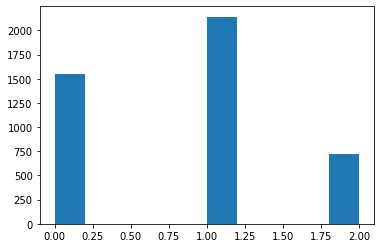

In [12]:
pp.hist(categorizedAge)

## Business Travel

Początkowo sprawdzamy, jakie wartości zawiera kolumna dotycząca podrózy biznesowych. Jak widać, przyjmuje ona jedynie 3 wartości, które zostaną skategoryzowane jako 0, 1, 2. 

In [13]:
display(generalData["BusinessTravel"].unique())

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [14]:
categorizedBusinessTravel = generalData["BusinessTravel"].replace(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],[0, 1, 2])
X.insert(1,"BusinessTravel", categorizedBusinessTravel)

## Department
Analogicznie jak w przypadku podróży biznesowych, nazwy poszczególnych departamentów zostaną skategoryzowane jako Sales - 0, R&D - 1, HR - 2. 

In [15]:
display(generalData["Department"].unique())

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [16]:
categorizedDepartment = generalData["Department"].replace(['Sales', 'Research & Development', 'Human Resources'],[0, 1, 2])
X.insert(1,"Department", categorizedBusinessTravel)

## Distance From Home
W kolejnym kroku należy skategoryzować odległość od domu. Zakres podany w kilometrach wynosi od 1 do 29 km. Na podstawie wykresu można podzielić tą drogę na trzy kategorie: za bliską odległość do pracy można przyjąć wartość od 1 do 5 km, średnią - od 6 do 14, a za dużą - od 15 km. Stworzone kategorie opiszemy etykietami 0, 1 i 2.  

(array([624., 633., 252., 192., 195., 177., 252., 240., 255., 258.,  87.,
         60.,  57.,  63.,   0.,  78.,  96.,  60.,  78.,  66.,  75.,  54.,
         57.,  81.,  84.,  75.,  75.,  36.,  69.,  81.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        , 15.93333333, 16.86666667, 17.8       , 18.73333333,
        19.66666667, 20.6       , 21.53333333, 22.46666667, 23.4       ,
        24.33333333, 25.26666667, 26.2       , 27.13333333, 28.06666667,
        29.        ]),
 <a list of 30 Patch objects>)

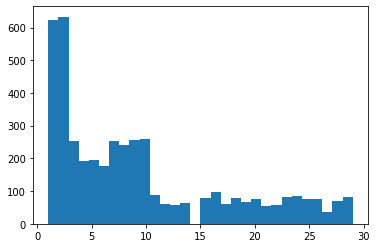

In [17]:
pp.hist(generalData["DistanceFromHome"], bins=30)

In [18]:
bins = [0, 5, 14, np.inf]
names = [0, 1, 2]
categorizedDistanceFromHome = pd.cut(generalData['DistanceFromHome'], bins, labels=names).astype(int)
X = X.join(categorizedDistanceFromHome)

## Education oraz Education Field
Zmienna Education jest już skategoryzowana, a etykiety mają wartość liczbową, a zatem można dodać ją do docelowego zbioru. W przypadu EducationField konieczna będzie zmiana etykiet na wartości liczbowe.
- 0 - 'Life Sciences'
- 1 - 'Other'
- 2 - 'Medical'
- 3 - 'Marketing'
- 4 - 'Technical Degree' 
- 5 - 'Human Resources'

In [19]:
X.insert(1,"Education", generalData["Education"])

In [20]:
display(generalData["EducationField"].unique())

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [21]:
categorizedEducationField = generalData["EducationField"].replace(['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree','Human Resources'],[0, 1, 2, 3, 4, 5])
X.insert(1,"EducationField", categorizedEducationField)

## EmployeeCount
Każdy profil jest unikatowy, a zatem można pominąć kolumnę EmployeeCount.

In [22]:
display(generalData["EmployeeCount"].unique())

array([1])

## Gender 
Należy zakodować płeć - "0" dla mężczyzny i "1" dla kobiety.

In [23]:
display(generalData["Gender"].unique())

array(['Female', 'Male'], dtype=object)

In [24]:
categorizedGender = generalData["Gender"].replace(['Male', 'Female'],[0, 1])
X.insert(1,"Gender", categorizedGender)

## Job Level i Job Role
JobLevel - Zajmowana pozycja w firmie (szczebel) w skali od 1 do 5 jest już odpowiednio skategoryzowana. 

In [25]:
X.insert(1,"JobLevel", generalData["JobLevel"])

JobRole - Nazwa zajmowanej pozycji, sategoryzowana następująco:
- 0 - 'Healthcare Representative', 
- 1 - 'Research Scientist',
- 2 - 'Sales Executive',
- 3 - 'Human Resources',
- 4 - 'Research Director',
- 5 - 'Laboratory Technician',
- 6 - 'Manufacturing Director',
- 7 - 'Sales Representative',
- 8 - 'Manager'

In [26]:
display(generalData["JobRole"].unique())

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [27]:
categorizedJobRole = generalData["JobRole"].replace(['Healthcare Representative', 'Research Scientist',  'Sales Executive', 'Human Resources', 'Research Director', 'Laboratory Technician', 'Manufacturing Director', 'Sales Representative', 'Manager']
    ,[0, 1, 2, 3, 4, 5, 6, 7, 8])
X.insert(1,"JobRole", categorizedJobRole)

## MaritalStatus 
Stan cywilny ponownie zostanie odpowiednio zakodowany ("Kawaler" - 0, "Zamężny" - 1, "Rozwodnik" - 2).

In [28]:
display(generalData["MaritalStatus"].unique())

array(['Married', 'Single', 'Divorced'], dtype=object)

In [29]:
categorizedMaritalStatus = generalData["MaritalStatus"].replace(["Single", "Married", "Divorced"] ,[0, 1, 2])
X.insert(1,"MaritalStatus", categorizedMaritalStatus)

In [30]:
display(X)

,EmployeeID,MaritalStatus,JobRole,JobLevel,Gender,EducationField,Education,Department,BusinessTravel,Attrition,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome
0,1,1,0,1,1,0,2,1,1,0,3.0,4.0,2.0,2,1
1,2,0,1,1,1,0,1,2,2,1,3.0,2.0,4.0,0,1
2,3,1,2,4,0,1,4,2,2,0,2.0,2.0,1.0,0,2
3,4,1,3,3,0,0,5,0,0,0,4.0,4.0,3.0,1,0
4,5,0,2,1,0,2,1,1,1,0,4.0,1.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0,1,1,1,2,4,1,1,0,4.0,1.0,3.0,1,0
4406,4407,2,5,1,0,2,4,1,1,0,4.0,4.0,3.0,0,0
4407,4408,1,2,2,0,0,2,1,1,0,1.0,3.0,3.0,0,2
4408,4409,2,5,1,0,2,2,1,1,0,4.0,1.0,3.0,1,2


## MonthlyIncome

Miesięczny dochód w rupiach na miesiąc można ponownie podzielić na 3 kategorie: 
- 0 - osoby najbiedniejsze, zarabiające do 74000 INR, 
- 1 - zarobki  przeciętne, między 74k a 150k rupii,  
- 2 - osoby najbogatsze, zarabiające ponad 150000 INR

(array([1095., 1047.,  870.,  327.,  330.,  168.,  156.,   54.,  162.,
         201.]),
 array([ 10090.,  29080.,  48070.,  67060.,  86050., 105040., 124030.,
        143020., 162010., 181000., 199990.]),
 <a list of 10 Patch objects>)

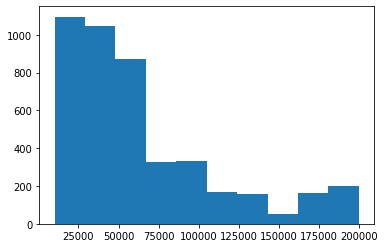

In [31]:
pp.hist(generalData["MonthlyIncome"])

In [32]:
bins = [0, 74000, 150000, np.inf]
names = ["0", "1", "2"]
categorizedMonthlyIncome = pd.cut(generalData['MonthlyIncome'], bins, labels=names).astype(int)
X = X.join(categorizedMonthlyIncome)

## NumCompaniesWorked
Łączna liczba firm, w których pracownik pracował. Zmienne przepisana bez zmian do zbioru X. 

In [33]:
X = X.join(generalData["NumCompaniesWorked"])

## Over18 - Czy pracownik ma ponad 18 lat (jest pełnoletni)?
Ponieważ wszystkie osoby mają ponad 18 lat, zmienna nie jest istotna i nie zostanie włączona do modelu.

In [34]:
display(generalData["Over18"].unique())

array(['Y'], dtype=object)

## PercentSalaryHike	
Bazując na wykresie podzielimy zbiór na osoby, które otrzymały podwyżkę do 15% włącznie i tych, dla których podwyżka była wyższa.

(array([1224.,  627.,  906.,  234.,  246.,  495.,  165.,  312.,   84.,
         117.]),
 array([11. , 12.4, 13.8, 15.2, 16.6, 18. , 19.4, 20.8, 22.2, 23.6, 25. ]),
 <a list of 10 Patch objects>)

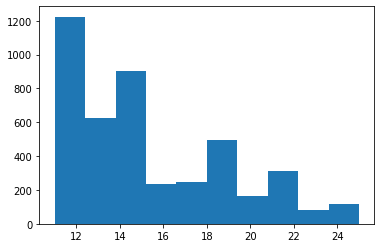

In [35]:
pp.hist(generalData["PercentSalaryHike"])

In [36]:
bins = [0, 15, np.inf]
names = [0, 1]
categorizedPercentSalaryHike = pd.cut(generalData['PercentSalaryHike'], bins, labels=names).astype(int)
X = X.join(categorizedPercentSalaryHike)

## StandardHours
Ponieważ wszyscy pracownicy pracują na pełen etat, pomijamy tą zmienną. 

In [37]:
display(generalData["StandardHours"].unique())

array([8])

## StockOptionLevel
Zmienna nie zawiera wiele kategorii, dlatego dołączamy ją bez zmian. 

In [38]:
display(generalData["StockOptionLevel"].unique())
X = X.join(generalData["StockOptionLevel"])

array([0, 1, 3, 2])

## TotalWorkingYear
Patrząc na wykres można zauważyć podział pracowników na trzy grupy:
- osoby młode, pracujące do 4 lat
- osoby ze średnim stażem (dominująca grupa), od 5 do 10 lat doświadczenia
- osoby doświadczone, ponad 10 lat  

/home/michal/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/michal/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 494., 1071., 1305.,  465.,  357.,  319.,  159.,  120.,   72.,
          39.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

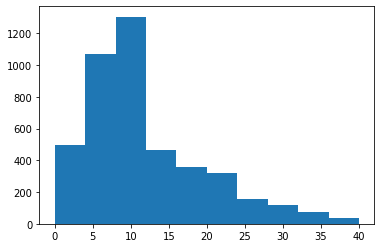

In [39]:
pp.hist(generalData["TotalWorkingYears"])

In [40]:
bins = [0, 4, 10, 50]
names = [0, 1, 2]
categorizedTotalWorkingYears = pd.cut(generalData['TotalWorkingYears'], bins, labels=names).astype(int)
X = X.join(categorizedTotalWorkingYears)

## TrainingTimesLastYear
Liczbę odbytych szkoleń w ciągu roku można skategoryzować jako:
- niska - 0 i 1 raz w roku, zakodowana jako 0
- średnia - 2 - 4 treningów w roku, oznaczona jako 1
- wysoka intensywność, zakodowana jako 2

(array([ 162.,  213.,    0., 1641.,    0., 1473.,  369.,    0.,  357.,
         195.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

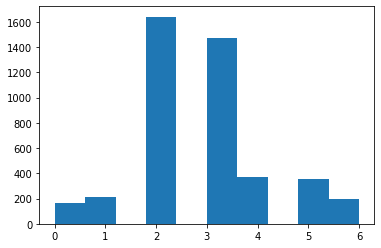

In [41]:
pp.hist(generalData["TrainingTimesLastYear"])

In [42]:
bins = [0, 1, 4, 6]
names = [0, 1, 2]
categorizedTrainingTimesLastYear = pd.cut(generalData['TrainingTimesLastYear'], bins, labels=names).astype(int)
X = X.join(categorizedTrainingTimesLastYear)

## YearsAtCompany
Liczba lat w firmie zostanie podzielona na dwie grupy - osoby które pracują do 10 lat oraz osoby ze stażem powyżej 10 lat. 

(array([0.07993197, 0.08027211, 0.05340136, 0.01292517, 0.00765306,
        0.00986395, 0.00272109, 0.00102041, 0.00153061, 0.00068027]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <a list of 10 Patch objects>)

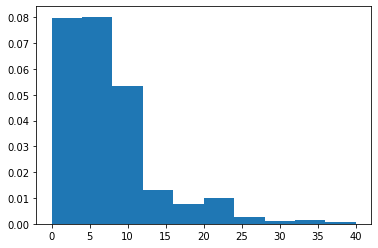

In [43]:
pp.hist(generalData["YearsAtCompany"], density=20)

In [44]:
bins = [0, 10, 50]
names = [0, 1]
categorizedYearsAtCompany = pd.cut(generalData['YearsAtCompany'], bins, labels=names).astype(int)
X = X.join(categorizedYearsAtCompany)

## YearsSinceLastPromotion
Analogicznie lata od ostatniego awansu zostaną podzielone na trzy kategorie - do 2 lat włącznie, 2-7 lat i od 8 lat wzwyż.

(array([0.42539683, 0.07210884, 0.05124717, 0.02040816, 0.04897959,
        0.00816327, 0.01043084, 0.01088435, 0.00907029, 0.00997732]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

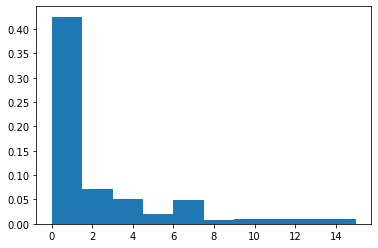

In [45]:
pp.hist(generalData["YearsSinceLastPromotion"], density=20)

In [46]:
bins = [0, 2, 7, 30]
names = [0, 1, 2]
categorizedYearsSinceLastPromotion = pd.cut(generalData['YearsSinceLastPromotion'], bins, labels=names).astype(int)
X = X.join(categorizedYearsSinceLastPromotion)

## YearsWithCurrManager
Podział na 2 grupy - 0 - 6 lat oraz 7 - 18 lat.

(array([0.13565426, 0.19447779, 0.05162065, 0.01160464, 0.1292517 ,
        0.03641457, 0.00880352, 0.01280512, 0.0040016 , 0.00360144]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

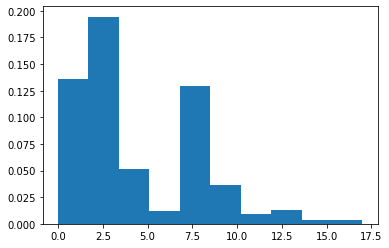

In [47]:
pp.hist(generalData["YearsWithCurrManager"], density=20)

In [48]:
bins = [0, 6, 30]
names = [0, 1]
categorizedYearsWithCurrManager = pd.cut(generalData['YearsWithCurrManager'], bins, labels=names).astype(int)
X = X.join(categorizedYearsWithCurrManager)

## Tabela Manager Survey - zmienne JobInvolvement i PerformanceRating
Zmienne zawarte w tableli dotyczącej opinii na temat managera są już odpowiednio zakodowane (przyjmują wartości liczbowe od 1 do 4), dlatego można bezpośrednio dołączyć je do zbioru X.  

In [49]:
display(managerSurveyData["JobInvolvement"].unique())
X = X.join(managerSurveyData["JobInvolvement"])

array([3, 2, 1, 4])

In [50]:
display(managerSurveyData["PerformanceRating"].unique())
X = X.join(managerSurveyData["PerformanceRating"])

array([3, 4])

## Czyszczenie danych i podział na zbiory testowe i treningowe
Przed przystąpieniem do tworzenia zbiorów: X i y, zarówno treningowego jak i testowego, należy dodatkowo oczyścić dane z pustych i nieskonczonych wartości. Początkowo zbiór zawierał 4410 obserwacji. Po usunięciu zbędnych wierszy zostało ich 4327.  

In [51]:
np.any(np.isnan(X))
np.all(np.isfinite(X))
X = X.dropna()
X = X[~X.isin([np.nan, np.inf, -np.inf, -9223372036854775808]).any(1)]
display(X)

,EmployeeID,MaritalStatus,JobRole,JobLevel,Gender,EducationField,Education,Department,BusinessTravel,Attrition,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
1,2,0,1,1,1,0,1,2,2,1,...,0.0,1,1,1,1,0,0,0,2,4
3,4,1,3,3,0,0,5,0,0,0,...,3.0,0,3,2,2,0,1,0,2,3
5,6,1,4,4,1,0,3,1,1,0,...,3.0,0,0,2,2,0,1,1,3,3
8,9,1,5,3,0,0,3,1,1,0,...,0.0,1,0,1,1,0,1,1,3,4
9,10,2,5,4,1,2,4,0,0,0,...,1.0,0,1,1,1,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,4400,1,2,1,1,1,3,1,1,0,...,6.0,0,0,2,1,1,1,1,2,3
4403,4404,0,6,1,1,2,3,2,2,0,...,0.0,1,1,2,1,1,2,1,3,3
4404,4405,0,3,2,1,1,3,1,1,0,...,1.0,1,0,1,1,0,0,0,2,3
4407,4408,1,2,2,0,0,2,1,1,0,...,0.0,1,0,1,1,0,0,0,3,4


Następnie należy przygotować zbiór y, zawierający zmienną objaśnianą Attrition. Jednocześnie dzięki temu zbiór X zawiera będzie tylko zmienne objaśniające. 

In [52]:
y = X['Attrition'].copy()  
del X['Attrition']
y.head()

1    1
3    0
5    0
8    0
9    0
Name: Attrition, dtype: int64

In [53]:
display(X)

,EmployeeID,MaritalStatus,JobRole,JobLevel,Gender,EducationField,Education,Department,BusinessTravel,EnvironmentSatisfaction,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
1,2,0,1,1,1,0,1,2,2,3.0,...,0.0,1,1,1,1,0,0,0,2,4
3,4,1,3,3,0,0,5,0,0,4.0,...,3.0,0,3,2,2,0,1,0,2,3
5,6,1,4,4,1,0,3,1,1,3.0,...,3.0,0,0,2,2,0,1,1,3,3
8,9,1,5,3,0,0,3,1,1,2.0,...,0.0,1,0,1,1,0,1,1,3,4
9,10,2,5,4,1,2,4,0,0,2.0,...,1.0,0,1,1,1,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,4400,1,2,1,1,1,3,1,1,4.0,...,6.0,0,0,2,1,1,1,1,2,3
4403,4404,0,6,1,1,2,3,2,2,3.0,...,0.0,1,1,2,1,1,2,1,3,3
4404,4405,0,3,2,1,1,3,1,1,3.0,...,1.0,1,0,1,1,0,0,0,2,3
4407,4408,1,2,2,0,0,2,1,1,1.0,...,0.0,1,0,1,1,0,0,0,3,4


Mając już zbiór X i y dzielimy je na podzbiory: treningowy (na którym uczyć będziemy model), oraz testowy (który posłuży do oceny jakości modelu).  

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

## Zastosowanie regresji logistycznej i interpretacja wyników

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Testowanie jakości modelu

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

print('Współczynniki: \n', lr.coef_)
print("Błąd średniokwadratowy: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Metryka R2 (wariancji): %.2f' % r2_score(y_test, y_pred))

Współczynniki: 
 [[-4.01751696e-05 -5.52035181e-01 -6.58713506e-02 -5.04518027e-02
  -1.70709036e-02  7.33328656e-02 -8.24312517e-02  3.74236863e-01
   3.74236863e-01 -3.22727603e-01 -2.86079429e-01 -2.34259514e-01
  -5.12843824e-01  1.85401030e-01 -3.20055237e-01  1.68983500e-01
   1.38889129e-02  1.47382768e-02 -4.45089802e-01 -2.82676082e-01
  -6.54218228e-01  5.01675410e-01  2.89474017e-01  2.03216692e-03
   3.19016272e-01]]
Błąd średniokwadratowy: 0.12
Metryka R2 (wariancji): -0.09


## Oszacowanie jakości predykcji

Mając określone zbiory uczące i walidujące można przystąpić to oszacowania najprostszego modelu regresji logistycznej. Jakość modelu można sprawdzić, korzystając z wskaźnika dobroci dopasowania i macierzy błędów, a także korzystając z krzywej ROC. Każda z tych trzech metod da nam nieco inny pogląd na jakość modelu.


**Wskaźnik dobroci dopasowania** (ang. *accuracy score*) pozwoli ogólnie zorientować się co do jakości modelu. 

**Macierz błędów** (ang. *confusion matrix*) umożliwi zorientowanie się, czy w przypadku gdy model pomyli się, to jakiego typu będzie to błąd. Dwa podstawowe rodzaje błędów wykrywane w ten sposób to klasyfikacja fałszywie pozytywna (ang. *false positive*) i fałszywie negatywna (ang. *false negative*). Z naszego punktu widzenia różnica jest znacząca. W przypadku błędu *false positive*, model będzie miał tendencję do mylenia się (o ile oczywiście wskaźnik dobroci dopasowania będzie odpowiednio wysoki), oznaczając błędnie osobę jako kandydata do odejścia (gdzie pracownik nie miał zamiaru odejść). W takiej sytuacji, gdy zaczniemy dodatkowo zabiegać o utrzymanie tego pracownika, nie zaszkodzi to zbytnio żadnej ze stron, a jedynie może podnieść morale członka załogi, gdy ten poczuje się przez nas "niechcący" nieco bardziej "dopieszczony". Inaczej wygląda sytuacja, gdy model zignoruje "objawy", że pracownik nie jest zadowolony z obecnego pracodawcy - w takiej sytuacji jesteśmy narażeni na wymienione na początku tego dokumentu nieprzyjemności. 

Ostatnim wskaźnikiem jest **krzywa ROC**. Jest niejako graficzną reprezentacją macierzy błędów. Warto zwrócić uwagę na pole powierzchni pod krzywą (określane także jako Współczynnik Giniego). Współczynnik Giniego jest doskonałą miarą jakości modelu i może być interpretowany jako % „idealności” danego modelu predykcyjnego, co jest dla nas szczególnie istotne, biorąc pod uwagę, że model ma mieć zastosowanie nie tylko dla danych historycznych, ale też dla obserwacji w przyszłości.  

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

print("Wskaźnik dobroci dopasowania: %.2f" % accuracy_score(y_test,y_pred))
print("Macierz błędów:\n", confusion_matrix(y_test,y_pred))
print("Krzywa ROC:\n", roc_curve(y_test,y_pred))

Wskaźnik dobroci dopasowania: 0.88
Macierz błędów:
 [[618   2]
 [ 79   5]]
Krzywa ROC:
 (array([0.        , 0.00322581, 1.        ]), array([0.        , 0.05952381, 1.        ]), array([2, 1, 0]))


Mając wartości liczbowe dla krzywej ROC, konieczna jest ich wizualiacja. W tym celu definiujemy funkcję "plot_roc_curve", przyjmująca jako argumenty wartość false_positive_rate i true_positive_rate, a więc procent danych zakwalifikowanych niepoprawnie i poprawnie.   

In [58]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

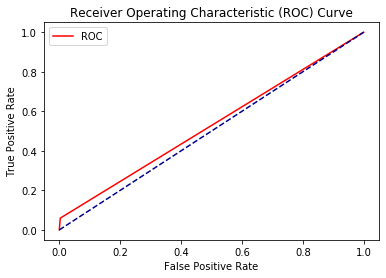

In [59]:
import pylab as plt
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)

Otrzymany model jest źle dopasowany do danych. Pomimo wysokiej wartości wskaźnika dobroci dopasowania (88%), mamy duży odsetek obserwacji sklasyfikowanych jako False Negative - a więc pomija część osób, które nie są zadowolone ze swojej pracy. 

## Optymalizacja progu odcięcia

Indeks Youdena odnosi się bezpośrednio do czułości i swoistości i określa optymalny punkt przecięcia. Jest bardziej czytelny niż pole powierzchni pod krzywą ROC, ponieważ nie tylko obrazuje dokładność testu, ale również zapewnia najlepsze wartości sumy czułości i swoistości. 

Indeks ten dotyczy danych binarnych (dla dwóch grup) i jest definiowany jako:
 ***J(t) = czułość + specyficzność - 1*** 
 
 lub inaczej 

 ***J(t) = TPR + TNR - 1***

In [60]:
def cutoff_youdens_j(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    # convering int to float
    tn, fp, fn, tp = float(tn), float(fp), float(fn), float(tp)
    sensitivity = (tp/(tp+fn))
    specificity = (tn/(tn+fp))
    j = (sensitivity + specificity) - 1
    return j
    
jt = cutoff_youdens_j(y_test, y_pred)
print("Wartość indeksu Youndena: %.3f" % jt)

Wartość indeksu Youndena: 0.056


Indeks Youndena przyjmuje wartości z zakresu między 0 a 1. Idealny model przyjmuje wartość 1. Ponieważ obecny model ma wartość 0, oznacza to, że jest on kiepskiej jakości. 

## Model Regresji Krzyżowej 
Zanim porzucimy model Regresji Logistycznej jako nieodpowiedni dla naszego problemu, zastosujemy go raz jeszcze. Tym razem jednak najpierw usuniemy zmienne nieistotne statystycznie, a następnie zastosujemy raz jeszcze regresję logistyczną, tym razem uzupełnioną o walidacje krzyżową (LogisticRegressionCV).

### Recursive Features Elimination
Metoda RFE (ang. *Recursive Feature Elimination*) rekurencyjnie usuwa zmienne, a następnie z tych które pozostały, tworzy model. Wykorzystuje ona wskaźnik dobroci dopasowania (ang. *accuracy metric*) do uporządkowania zmienych w kolejności od najbardziej istotnych do najmniej. Metoda RFE przyjmuje model, dla którego ma dopasować zmienne oraz docelową liczbę zmiennych. Jako wyjście otrzymujemy ranking zmiennych, gdzie przez 1 oznacza się zmienną najbardziej istotną statystycznie. 

W pierwszym kroku uruchamiamy model dla losowej liczby docelowych zmiennych.

In [61]:
from sklearn.feature_selection import RFE
model = LogisticRegression(solver="lbfgs", max_iter=500)

#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False False False False  True False False False
  True False  True False False False False False  True  True False False
  True]
[19  1 14 18 15 11 12  2  1  4  5  7  1  6  1 10 16 17  9  3  1  1  8 13
  1]


W powyższy model oszacowano dla siedmiu najlepszych zmiennych. Aby otrzymać ich optymalną liczbę, sprawdzimy wynik testu dobroci dopasowania dla wszystkich możliwych kombinacji i wybierzemy optymalną liczbę. 

In [62]:
#no of variables
nof_list=np.arange(1,len(X.columns))            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression(solver="lbfgs", max_iter=500)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optymalna liczba zmiennych: %d" %nof)
print("Wynik dla %d zmiennych: %f" % (nof, high_score))
print("Wyniki dla poszczególnych zmiennych:\n", score_list)

Optymalna liczba zmiennych: 19
Wynik dla 19 zmiennych: 0.867898
Wyniki dla poszczególnych zmiennych:
 [0.8650568181818182, 0.8650568181818182, 0.8650568181818182, 0.8650568181818182, 0.8650568181818182, 0.8650568181818182, 0.8650568181818182, 0.8622159090909091, 0.8607954545454546, 0.859375, 0.8650568181818182, 0.8650568181818182, 0.8664772727272727, 0.8664772727272727, 0.8636363636363636, 0.8607954545454546, 0.8607954545454546, 0.8636363636363636, 0.8678977272727273, 0.8636363636363636, 0.8678977272727273, 0.8678977272727273, 0.8678977272727273, 0.8678977272727273]


Jak widzimy, optymalna liczba zmiennych wynosi 19, natomiast pomiędzy wynikami dla każdej liczby zmiennych nie mia większej różnicy, jeśli chodzi o jakość modelu. Z drugiej strony większa ilość może sprawić, że model będzie zbyt dopasowany do istniejących danych, dlatego docelowo weźmiemy tylko 5 z nich.  

In [63]:
from sklearn.linear_model import LogisticRegressionCV
cols = list(X.columns)
model = LogisticRegressionCV(solver="lbfgs", cv=5, max_iter=500)
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['MaritalStatus', 'Department', 'BusinessTravel', 'Age',
       'MonthlyIncome'],
      dtype='object')


In [64]:
X_selected = X[selected_features_rfe]
display(X_selected)

,MaritalStatus,Department,BusinessTravel,Age,MonthlyIncome
1,0,2,2,0,0
3,1,0,0,1,1
5,1,1,1,1,0
8,1,1,1,0,0
9,2,0,0,0,1
...,...,...,...,...,...
4399,1,1,1,1,2
4403,0,2,2,1,1
4404,0,1,1,0,0
4407,1,1,1,0,0


### LogisticRegressionCV
Podczas gdy zwykła regresja logistyczna wykorzystuje dostarczona dane, nie dokonując na nich żadnych poprawek, Krzyżowa Regresja Logistyczna dzieli zbiór uczący na różne kombinacje zbiorów uczących i walidujących przed samym uczeniem, co jest pomocne przy testowaniu modelu.  
Proces ten nazywa się K-Fold Cross Validation (stąd pochodzi człon CV) i jest bardzo często stosowaną metodą w uczeniu maszynowym.

Wskaźnik dobroci dopasowania: 0.88
Macierz błędów:
 [[618   2]
 [ 79   5]]
Krzywa ROC:
 (array([0.        , 0.00322581, 1.        ]), array([0.        , 0.05952381, 1.        ]), array([2, 1, 0]))
Wartość indeksu Youndena: 0.056


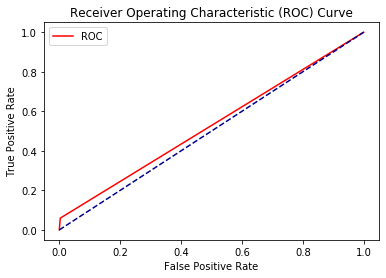

In [65]:
from sklearn.linear_model import LogisticRegressionCV

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.3, random_state=3)

lrcv = LogisticRegressionCV(solver="lbfgs", cv=5, max_iter=500)
lrcv.fit(X_train, y_train)
y_selected_pred = lrcv.predict(X_test)

j_t = cutoff_youdens_j(y_test, y_pred)

print("Wskaźnik dobroci dopasowania: %.2f" % accuracy_score(y_test,y_pred))
print("Macierz błędów:\n", confusion_matrix(y_test,y_pred))
print("Krzywa ROC:\n", roc_curve(y_test,y_pred))
print("Wartość indeksu Youndena: %.3f" %  cutoff_youdens_j(y_test,y_pred))

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plot_roc_curve(fpr, tpr)

Otrzymane wyniki nie są lepsze od tych, jakie dał zwykły model regresji, dlatego też przetestujemy inny model, mając nadzieję, że da lepsze wyniki. 

## Model Lasu losowego dla wszystkich zmiennych
Las losowy zbudowany jest z wielu drzew decyzyjnych. Każde drzewo budowane jest na innym, losowo wybranym
podzbiorze zbioru danych uczących, natomiast o podziele w drzewie decyduje najlepszy możliwy podział dla losowo wybranego małego podzbioru zmiennych (stąd nazwa Losowy).
Błąd klasyfikacji szacowany jest na podstawie obiektów nie włączonych do próby.
W naszym modelu wykorzystamy model RandomForestRegressor.

Max value: 0.776
Best number of estimators: 53.000


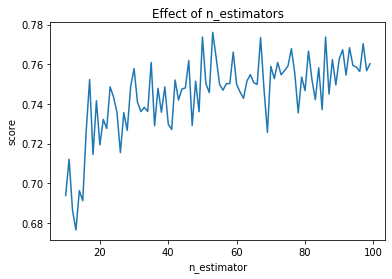

In [66]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

model = RandomForestRegressor(n_jobs=-1)
estimators = np.arange(10, 100, 1)
scores = []
max_score = 0
max_n = 0
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)
    if score > max_score:
        max_score = score
        max_n = n 
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
print("Max value: %.3f" % max_score)
print("Best number of estimators: %.3f" % max_n)

Przeprowadzilismy symulację celem określenia optymalnej liczby estymatorów, a więc liczby drzew w lesie. Okazało się, że najlepsze wyniki (77.6% skuteczności algorytmu) otrzymamy dla 53 drzew.   

In [115]:
random_forrest = RandomForestRegressor(n_estimators=max_n)
random_forrest.fit(X_train, y_train)

random_forrest.feature_importances_

array([0.07153534, 0.04486623, 0.08358643, 0.04690375, 0.01959112,
       0.06433843, 0.05248443, 0.02160733, 0.01571837, 0.05530456,
       0.07621122, 0.05654567, 0.05288475, 0.03542327, 0.02009776,
       0.08844463, 0.01987265, 0.0358055 , 0.01989   , 0.00696895,
       0.01035891, 0.02934194, 0.0191649 , 0.03783412, 0.01521973])

In [116]:
feature_importances = pd.DataFrame(random_forrest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances)

,importance
NumCompaniesWorked,0.088445
JobRole,0.083586
JobSatisfaction,0.076211
EmployeeID,0.071535
EducationField,0.064338
WorkLifeBalance,0.056546
EnvironmentSatisfaction,0.055305
Age,0.052885
Education,0.052484
JobLevel,0.046904


Mając zbudowany model drzewa, przyjrzyjmy się, jakie wagi otrzymały poszczególne zmienne. W wybranym modelu wziąto pod uwagę wszystkie 25 zmiennych. Najistotnejsze w kontekście zmiany pracy przez pracowanika okazały się:
- Liczba firm, dla których dana osoba już pracowała (waga 0.084914)
- Satysfakcja z pracy (0.069807)
- Zajmowane stanowisko (0.065916)
- Czy pracownik może pogodzić pracę z życiem osobistym (0.060988)
- Wykształcenie (0.058591)

## Podsumowanie
Jak widać, przyczyny dla których pracownik decyduje się odejść są różne. Główne z nich dotyczą obranej ścieżki kariery - tego, jak chętnie ktoś zmienia pracę czy też dziedzina, w której się specjalizuje (zmienna JobRole i EducationField). Można to wytłumaczyć tym, że popyt na specjalistów z pewnej branży (np. IT) jest wyjątkowo wysoki, a co za tym idzie pracownikowi ciężej będzie odmówić, gdy konkurencja zaproponuje mu lepsze warunki. Z drugiej strony pracodawca może zadbać o to, by pracownik odczuwał większą satysfakcję z pracy (zmienna JobSatisfaction znalazła się na trzecim miejscu, przebijając nawet zarobki), a także upewnić się, że w firmie przestrzega się filozofii work life balance. 